## *Importing necessary libraries*

In [226]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## *Data Sourcing*

### Step 1: Loading input data for Analysis

In [227]:
# Importing Housing.csv
housing = pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')

## *Data Visualization*

#### Checking first 5 rows of the data

In [228]:
#Looking at the first five rows
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Step: 2 Performing EDA
#### 1. Analyzing Columns
#### 2. Data Cleanup
#### 3. Data Vizualization

In [229]:
#Checking Shape of the data
housing.shape

(1460, 81)

#### Checking the columns

In [230]:
#CHecking Column information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Describing the columns

In [231]:
# Describe housing numerical columns
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## *Data Cleaning*

In [232]:
# 1. Checking the null values

housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [233]:
#Checking % of null variables in the columns
# round(100*housing.isnull().mean(),2)
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
MasVnrType     59.73
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [234]:
# Dropping 'PoolQC','MiscFeature', 'Alley', 'Fence', 'MasVnrType' columns with null % > 50%
housing.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'MasVnrType'],axis=1,inplace=True)

# Dropping Id column
housing.drop(['Id'],axis=1,inplace=True)

In [235]:
#Checking null% again
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
                ...  
TotalBsmtSF      0.00
Heating          0.00
MSZoning         0.00
CentralAir       0.00
SalePrice        0.00
Length: 75, dtype: float64

In [236]:
# Dropping FireplaceQu column with null % > 40%
housing.drop(['FireplaceQu'],axis=1,inplace=True)

In [237]:
#Checking null% again
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
MSZoning         0.00
SalePrice        0.00
Length: 74, dtype: float64

In [238]:
#Dropping rows were LotFrontage values are null
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].quantile(0.5))
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
                ... 
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
MSZoning        0.00
SalePrice       0.00
Length: 74, dtype: float64

In [239]:
# Imputing GarageColumns
# Replacing null with NA
garageCols = ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']
housing[garageCols] = housing[garageCols].fillna('NA')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtQual        2.53
BsmtCond        2.53
                ... 
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
MSZoning        0.00
SalePrice       0.00
Length: 74, dtype: float64

In [240]:
# Imputing GarageColumns
# Replacing null with NA
basementCols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
housing[basementCols] = housing[basementCols].fillna('NA')
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


MasVnrArea     0.55
Electrical     0.07
GarageYrBlt    0.00
Fireplaces     0.00
Functional     0.00
               ... 
ExterCond      0.00
ExterQual      0.00
Exterior2nd    0.00
Exterior1st    0.00
SalePrice      0.00
Length: 74, dtype: float64

In [241]:
# Replacing MasVnrArea, Electrical with mode
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['Electrical'] = housing['Electrical'].fillna('NA')
housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)


MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
               ... 
ExterQual       0.0
MasVnrArea      0.0
Exterior2nd     0.0
Exterior1st     0.0
SalePrice       0.0
Length: 74, dtype: float64

In [242]:
#CHecking Column information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Checking distinct count for each column

In [243]:
housing.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 74, dtype: int64

In [244]:
#### Check for if any missing values present
housing.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 74, dtype: bool

## Data Exploration
#### Checking if target variable has linear relation with atleast one numeric variable before we perform linear regression

In [245]:
# Performing mapping to convert it to categorical variable
housing.MSSubClass = housing.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                             45:	'1-1/2 STORY - UNFINISHED ALL AGES',
                                             50:	'1-1/2 STORY FINISHED ALL AGES',
                                              60:	'2-STORY 1946 & NEWER',
                                              70:	'2-STORY 1945 & OLDER',
                                              75:	'2-1/2 STORY ALL AGES',
                                              80:	'SPLIT OR MULTI-LEVEL',
                                              85:	'SPLIT FOYER',
                                              90:	'DUPLEX - ALL STYLES AND AGES',
                                            120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                            150:	'1-1/2 STORY PUD - ALL AGES',
                                            160:	'2-STORY PUD - 1946 & NEWER',
                                            180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                            190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})


In [246]:
columns_to_map = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'BsmtExposure', 'HeatingQC', 'KitchenQual',
                  'GarageQual', 'GarageCond']
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Av': 3, 'Fa': 2, 'Po': 1, 'Mn': 1, 'No': 0, 'NA': -1}
for col in columns_to_map:
    housing[col] = housing[col].map(quality_mapping)


In [247]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
len(housing_numeric.columns)

45

In [248]:
# correlation matrix
cor = housing_numeric.corr()
cor

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.304522     0.234812    -0.053281   0.116685   
LotArea           0.304522  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.234812  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.053281 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.116685  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.083348  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.178469  0.103321     0.407252    -0.125694   0.311600   
ExterQual         0.165567  0.055570     0.726278    -0.138942   0.598160   
ExterCond        -0.016430  0.014732     0.013953     0.389163  -0.103925   
BsmtQual          0.130653  0.067527     0.593685    -0.133530   0.549009   
BsmtCond          0.043725  0.029510     0.262310     0.124614   0.164017   
BsmtExposure      0.156483  0.219790     0.288530    -0.066657   0.299393   
BsmtFinSF1        0.214367  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.042463  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.124098 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.363472  0.260833     0.537808    -0.171098   0.391452   
HeatingQC         0.090051  0.003581     0.457083    -0.014105   0.448855   
1stFlrSF          0.413773  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.072388  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.037469  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.368007  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.090343  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.006979  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.180534  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.047222  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.236840  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.004905 -0.017784    -0.183882    -0.087001  -0.174800   
KitchenQual       0.169829  0.067864     0.673331    -0.026707   0.530165   
TotRmsAbvGrd      0.320518  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.233221  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.099196  0.072599     0.288998    -0.006515   0.272029   
GarageCars        0.269539  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.323511  0.180403     0.562022    -0.151521   0.478954   
GarageQual        0.105626  0.078871     0.288121     0.016985   0.276507   
GarageCond        0.101961  0.076350     0.283730     0.015163   0.279371   
WoodDeckSF        0.075542  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.137014  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.010287 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.061945  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.037655  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.180819  0.077672     0.065166    -0.001985   0.004950   
MiscVal          -0.000255  0.038068    -0.031406     0.068777  -0.034383   
MoSold            0.010451  0.001205     0.070815    -0.003511   0.012398   
YrSold            0.006380 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.334771  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
LotFrontage        0.083348    0.178469   0.165567  -0.016430  0.130653   
LotArea            0.013788    0.103321   0.055570   0.014732  0.067527   
OverallQual        0.550684    0.407252   0.726278   0.013953  0.593685   
OverallCond        0.073741   -0.125694  -0.138942   0.389163 -0.133530   
YearBuilt          0.592855    0.311600   0.598160  -0.103925  0.549009   
YearRemodAdd       1.0

In [249]:
threshold = 0.7

# Find the pairs of columns where the correlation is above the threshold
high_corr_pairs = []

for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            colname = (cor.columns[i], cor.columns[j])
            high_corr_pairs.append(colname)

print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('ExterQual', 'OverallQual'), ('BsmtCond', 'BsmtQual'), ('1stFlrSF', 'TotalBsmtSF'), ('KitchenQual', 'ExterQual'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageArea', 'GarageCars'), ('GarageQual', 'GarageYrBlt'), ('GarageCond', 'GarageYrBlt'), ('GarageCond', 'GarageQual'), ('SalePrice', 'OverallQual'), ('SalePrice', 'GrLivArea')]


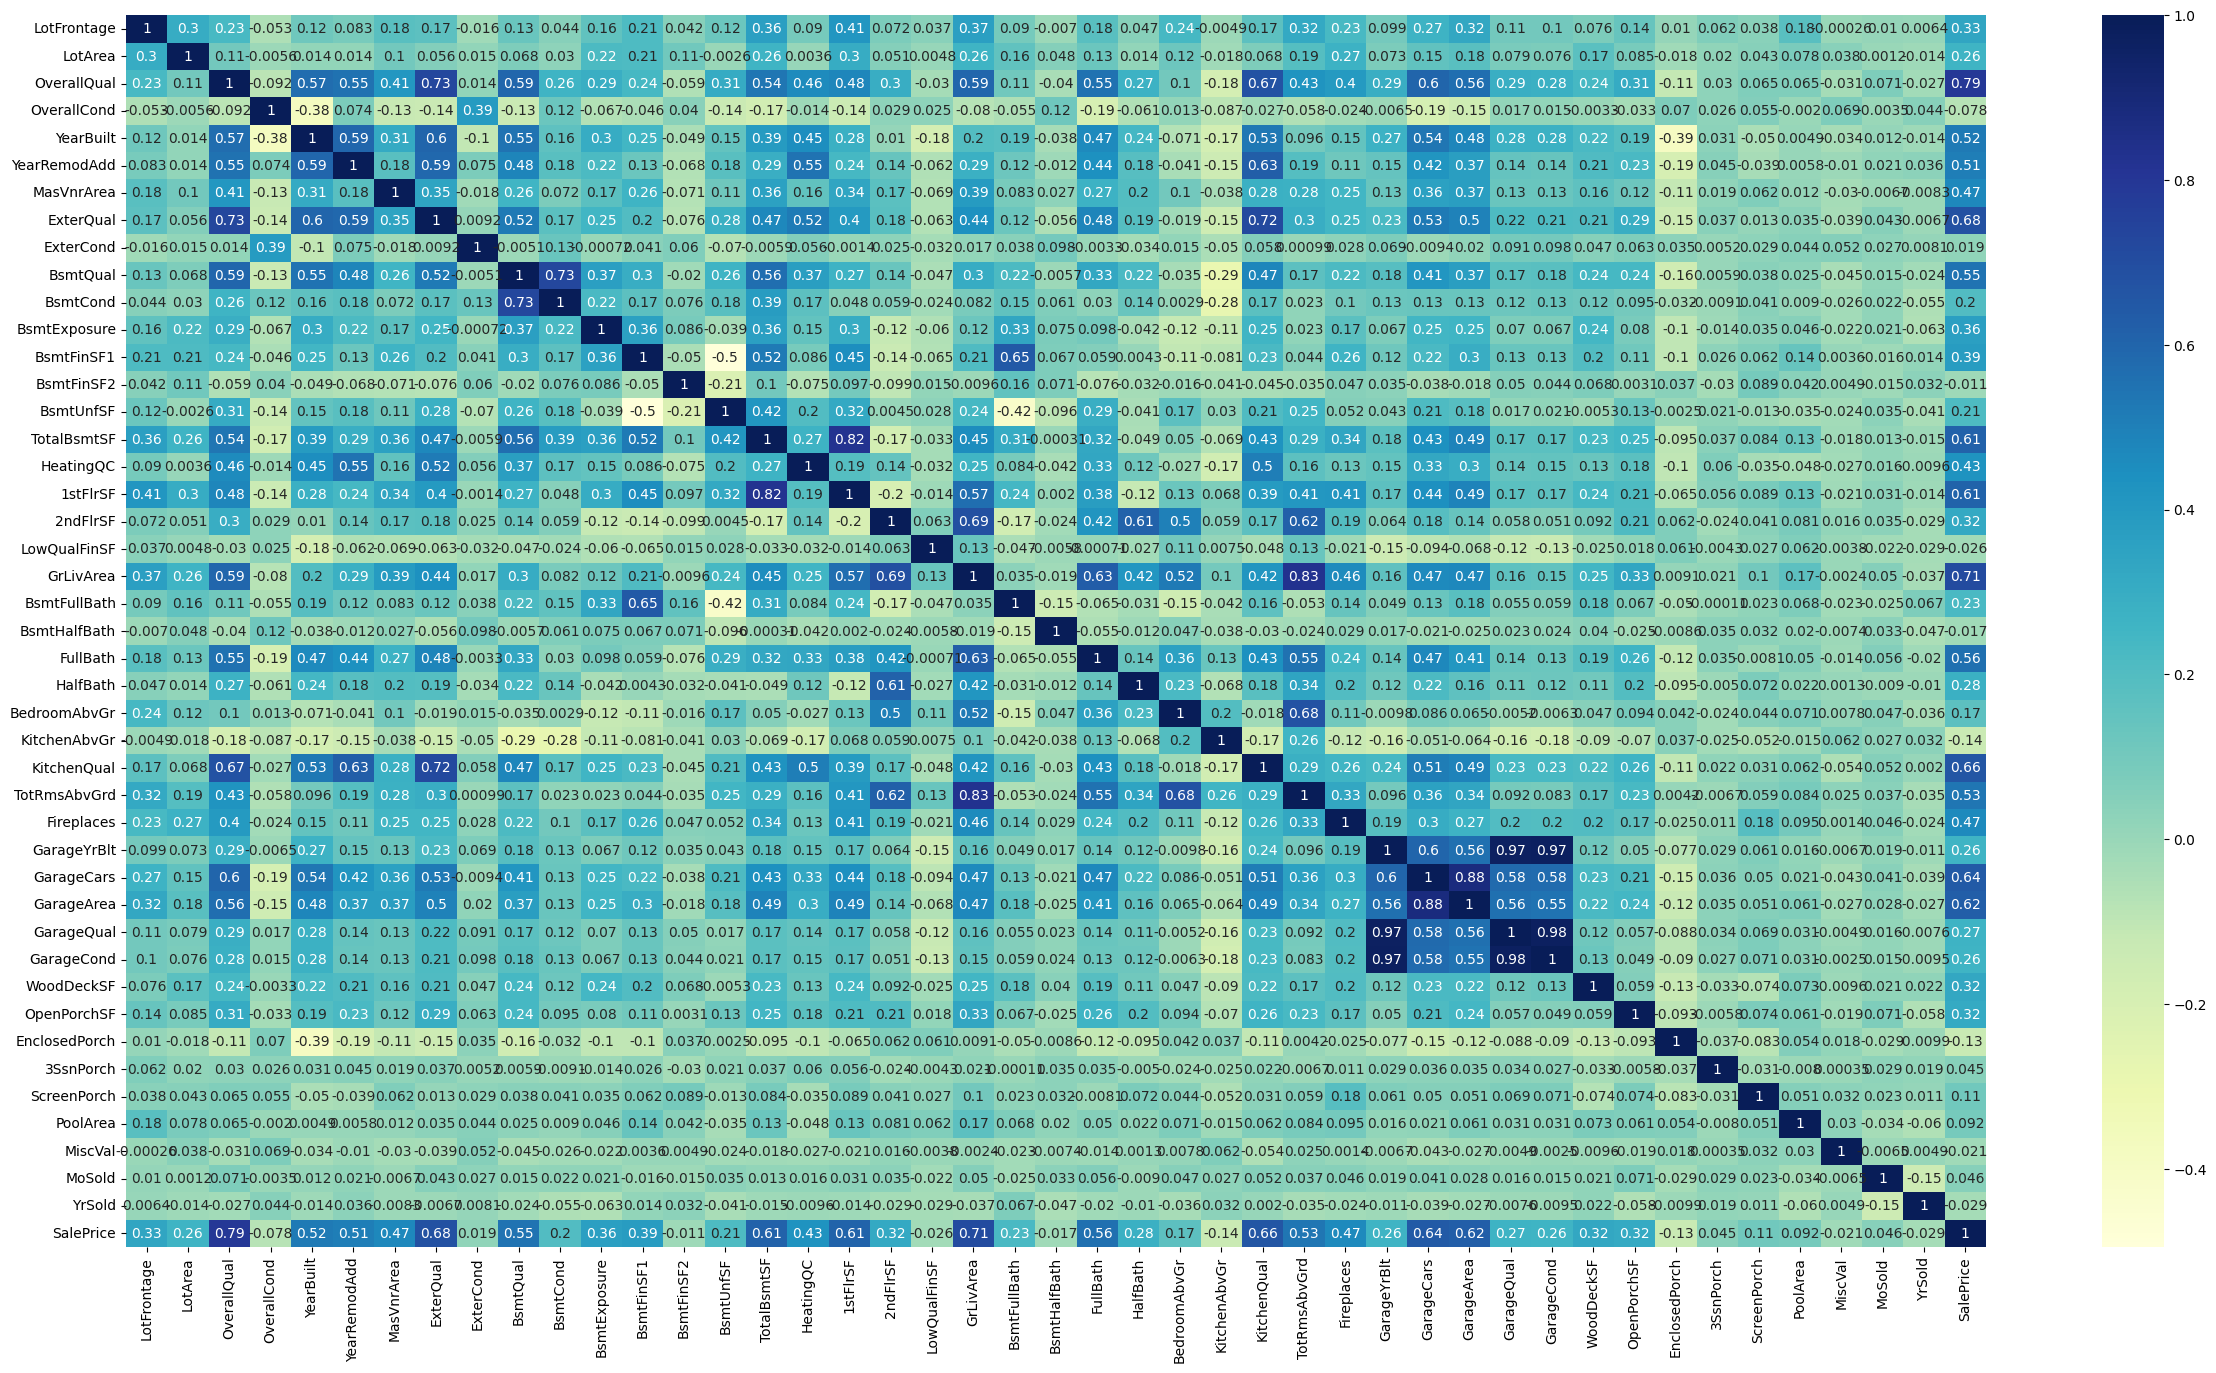

In [250]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


##The heatmap shows some useful insights:
####There is high Correlation between following independent variables

####'1stFlrSF' vs 'TotalBsmtSF' - First Floor square feet vs Total square feet of basement area

####'TotRmsAbvGrd' vs 'GrLivArea'- Total rooms above grade (does not include bathrooms) vs Above grade (ground) living area square feet

####'GarageArea', 'GarageCars' - The GarageArea and GarageCars are highly correlated

#### The Target variable 'SalePrice' is higly correlated with 'OverallQual', 'GrLivArea'

In [251]:
#Dropping Highly correlated columns - GarageCars, 1stFlrSF
# housing.drop(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd'],axis=1,inplace=True)

In [252]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

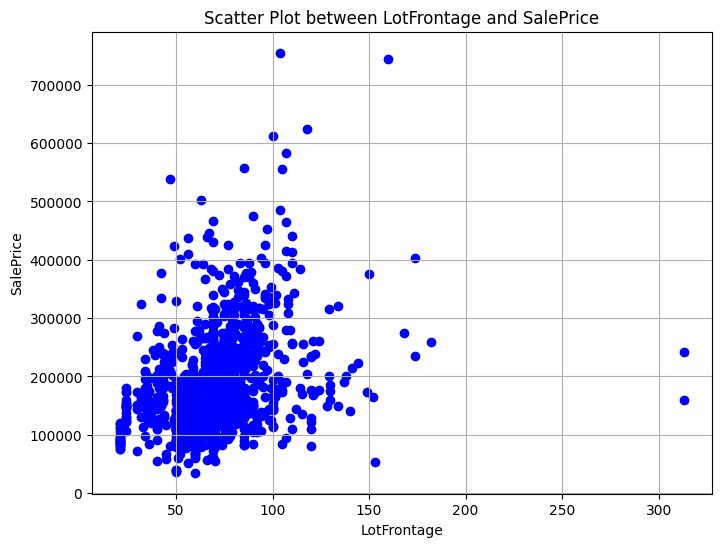

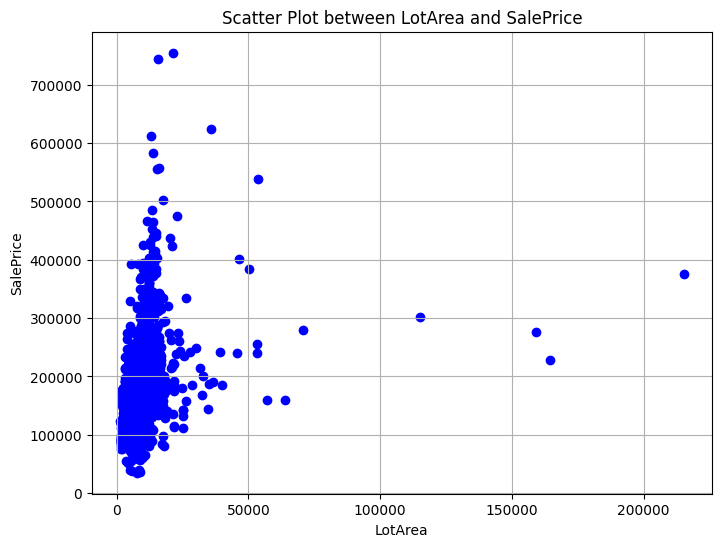

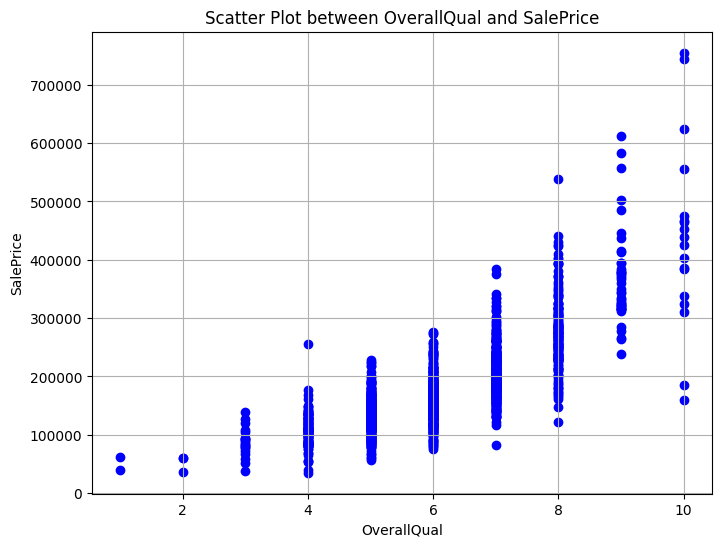

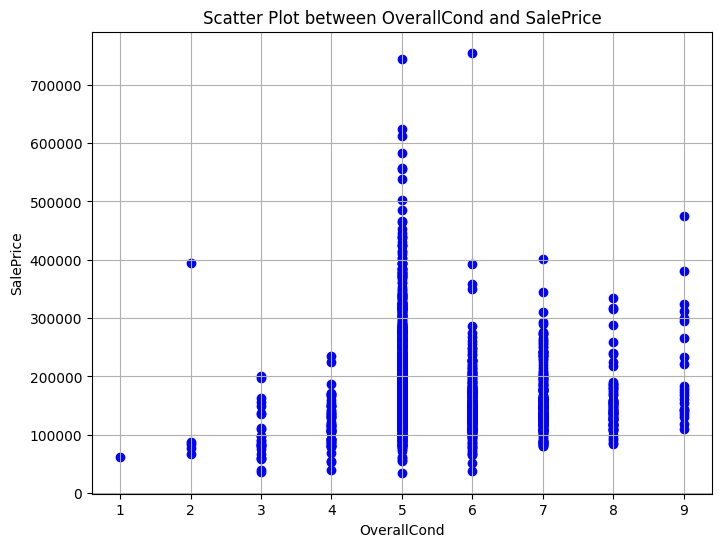

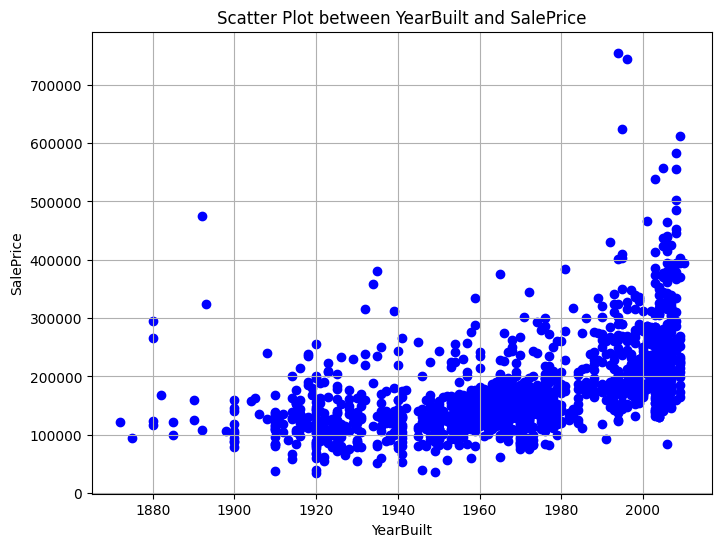

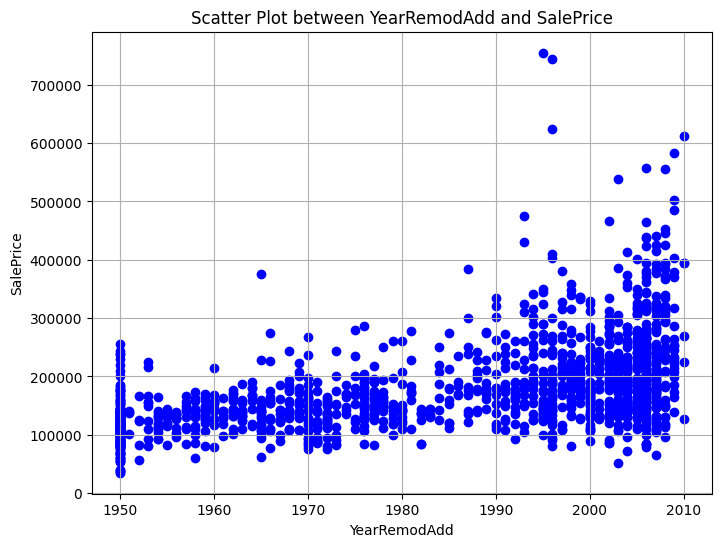

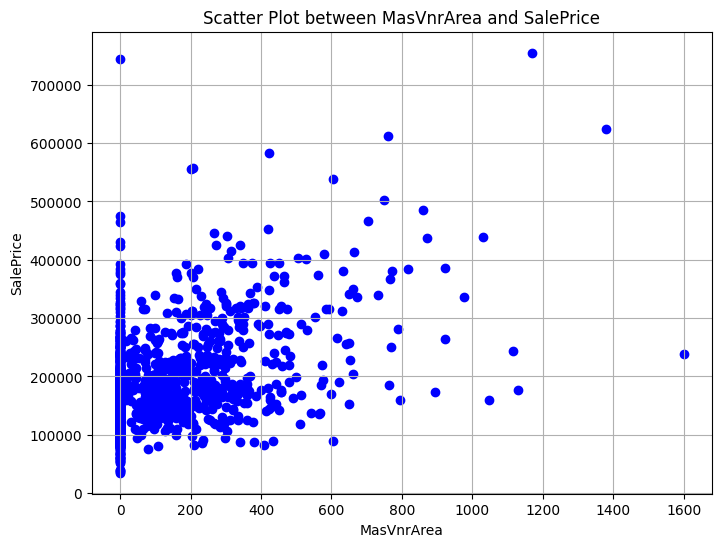

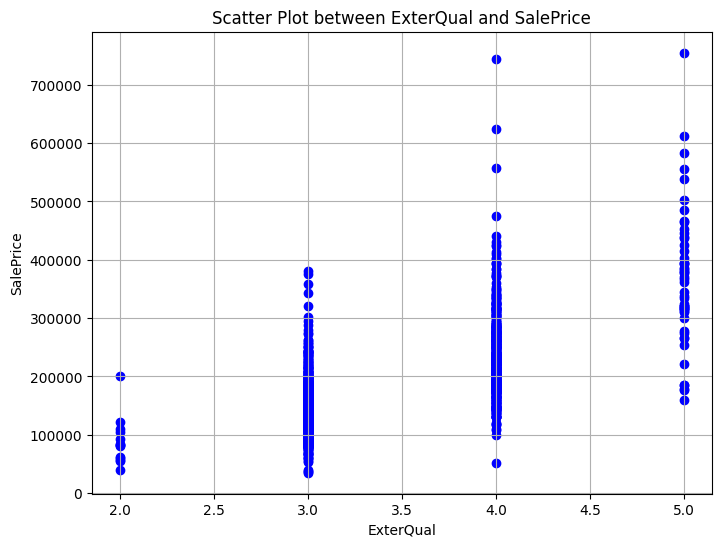

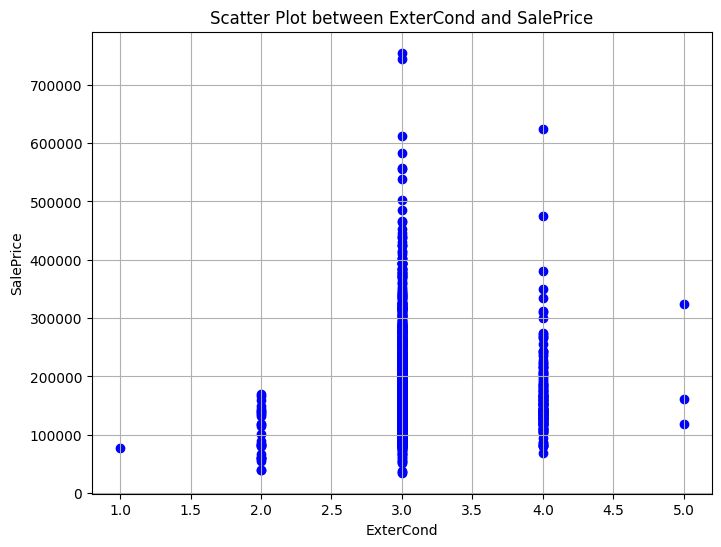

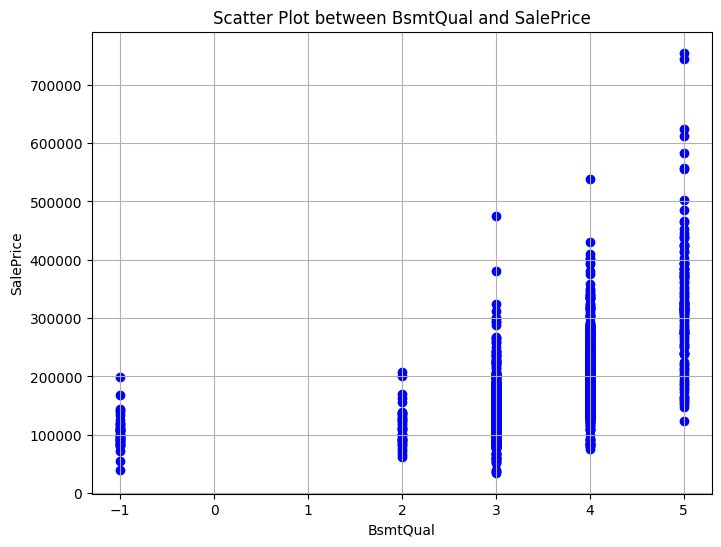

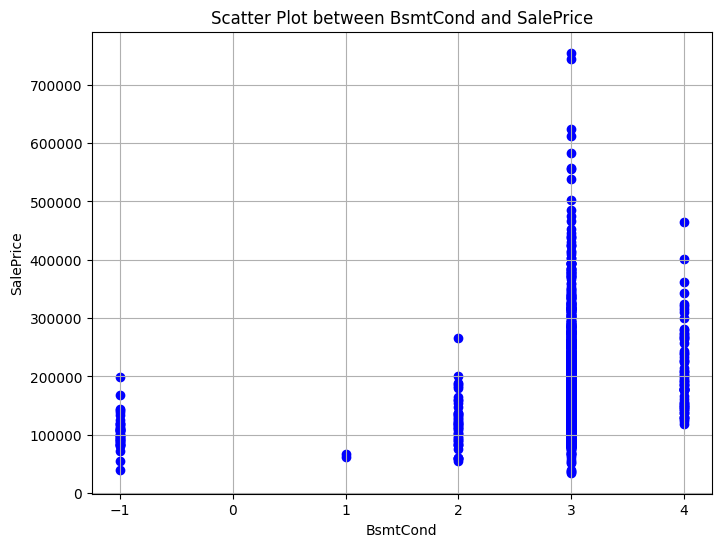

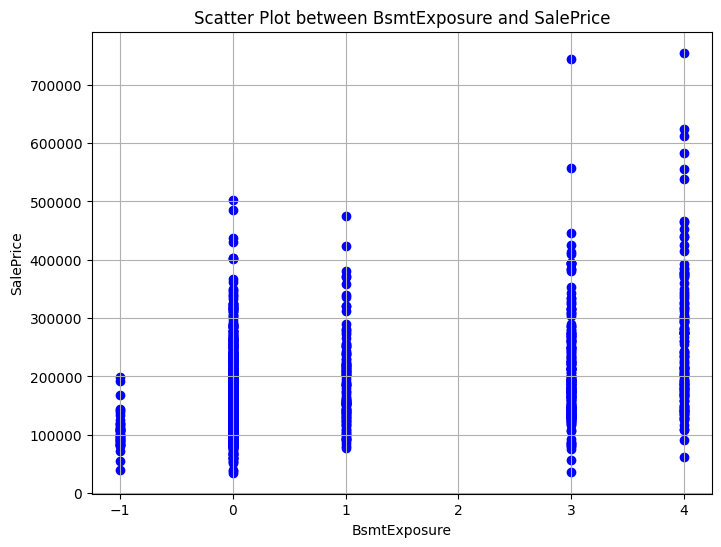

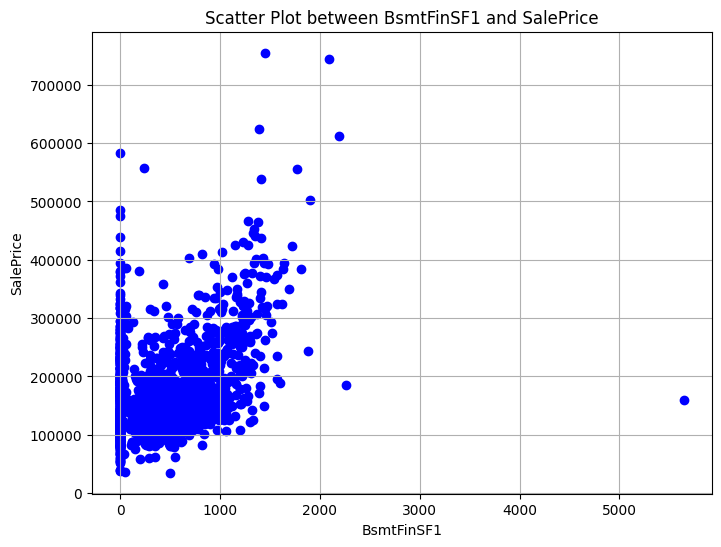

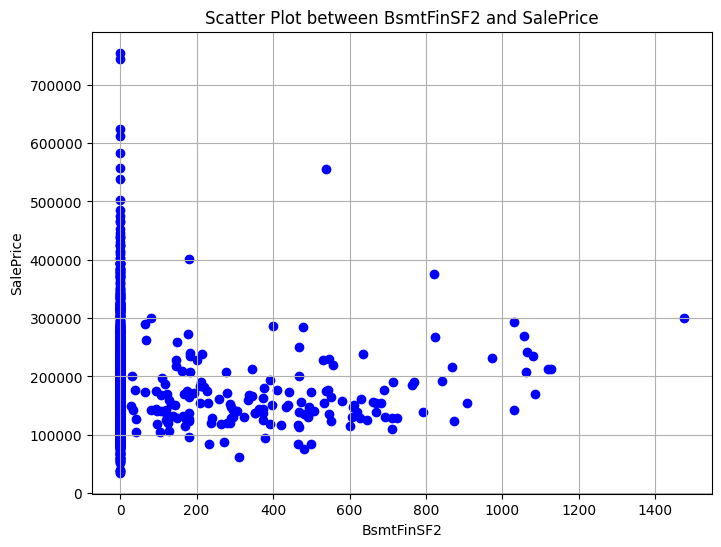

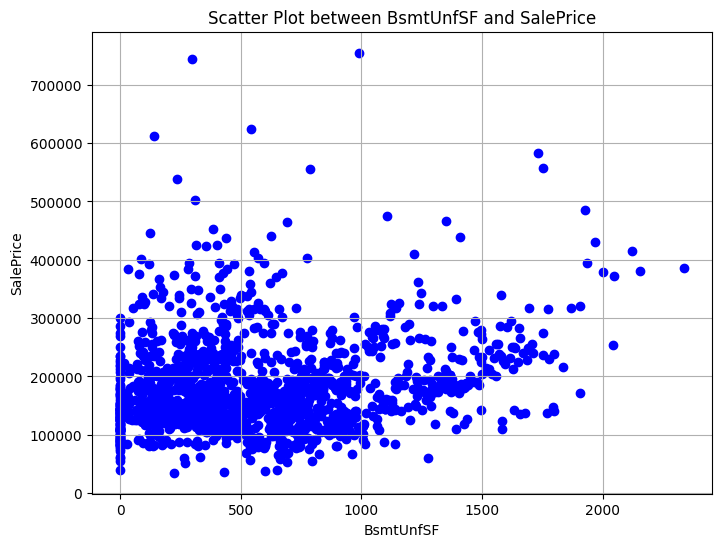

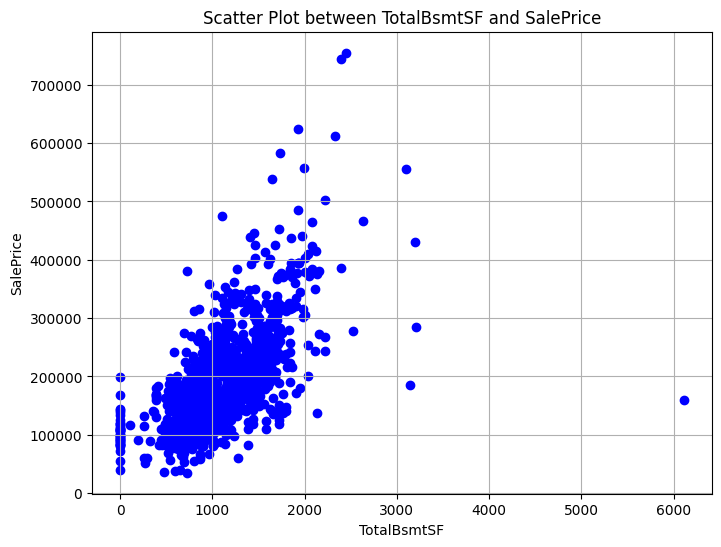

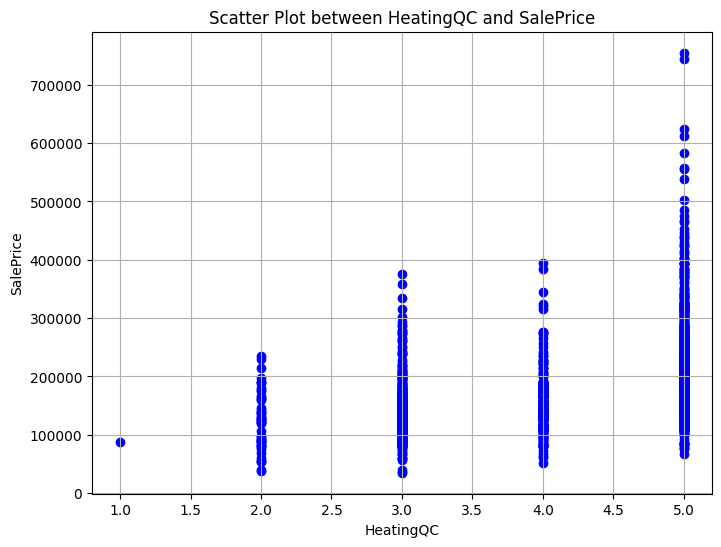

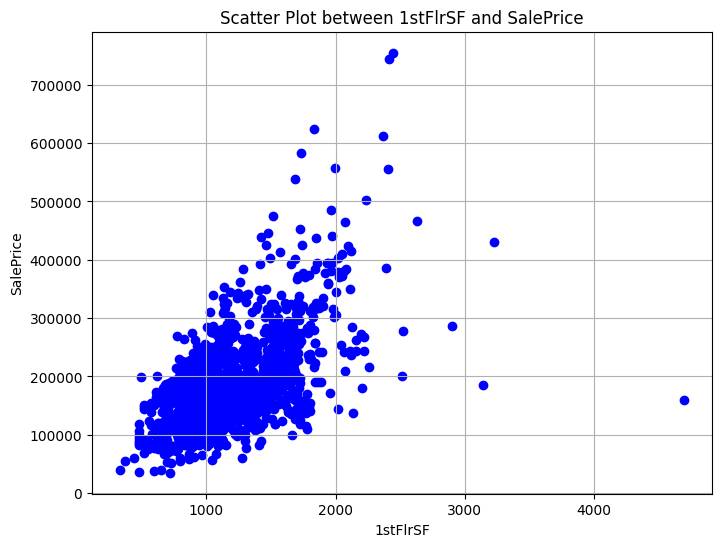

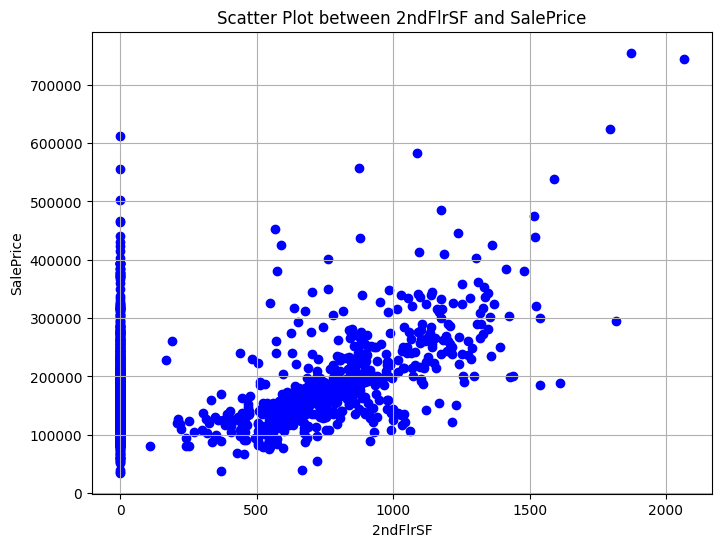

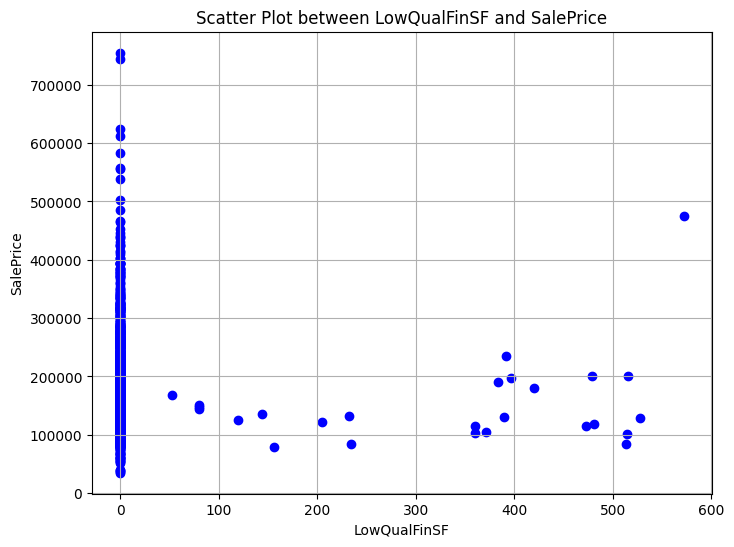

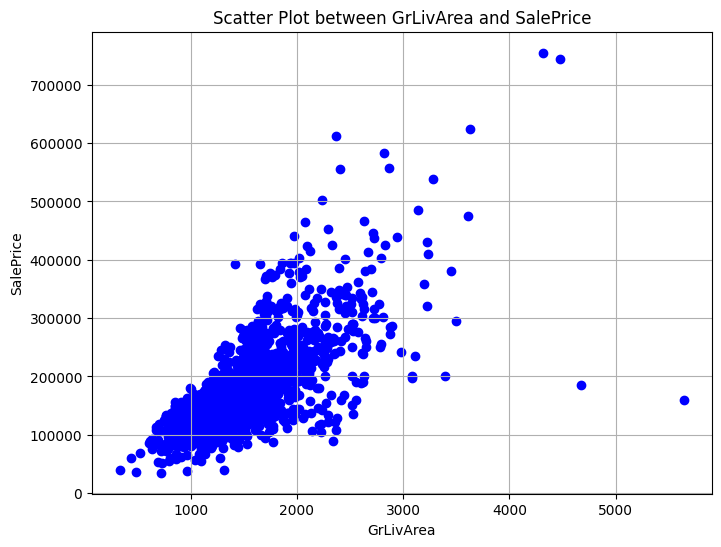

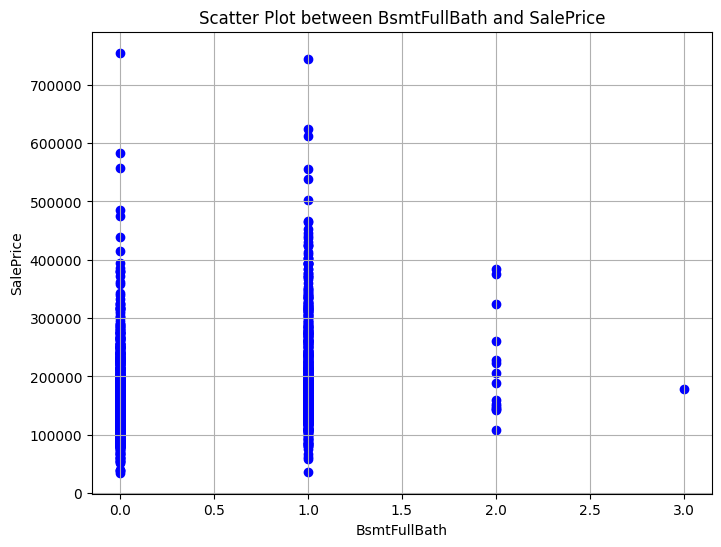

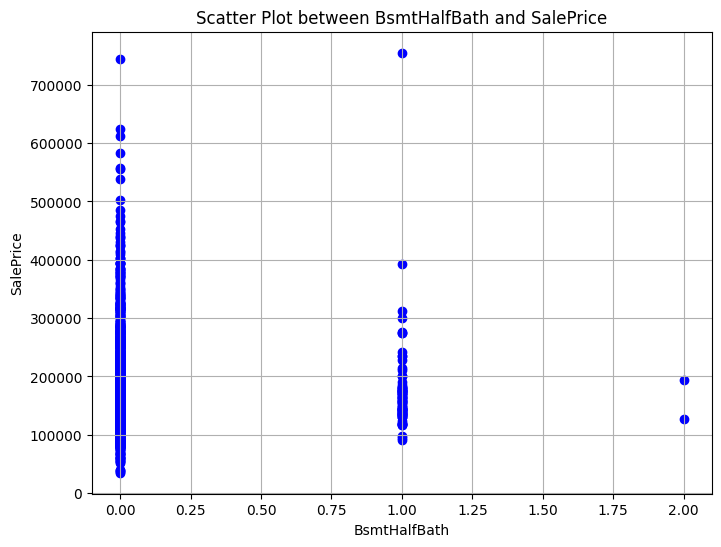

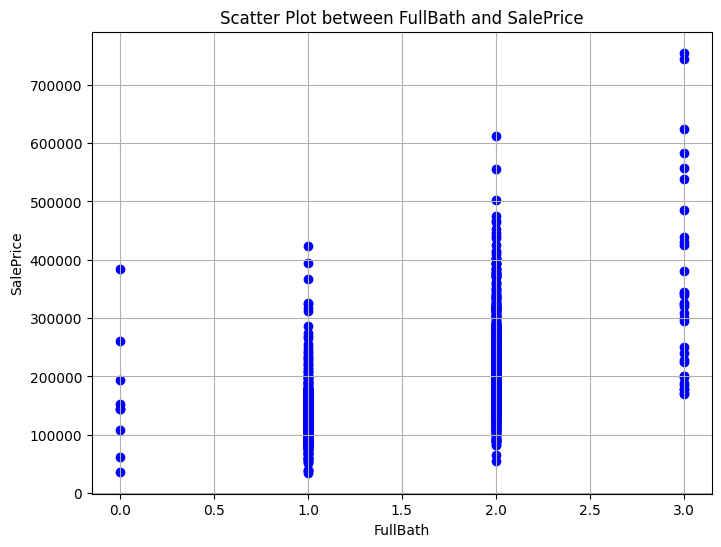

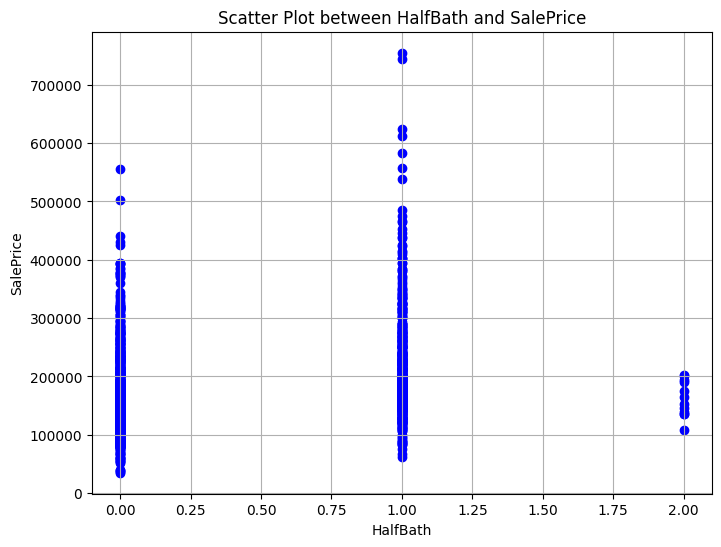

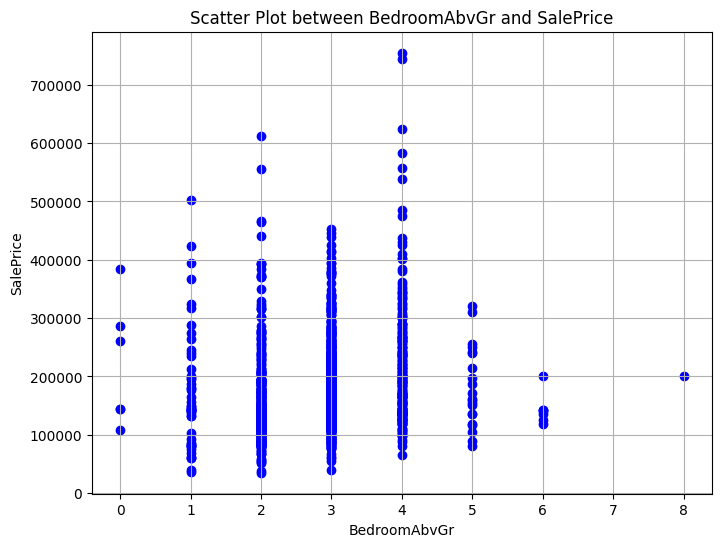

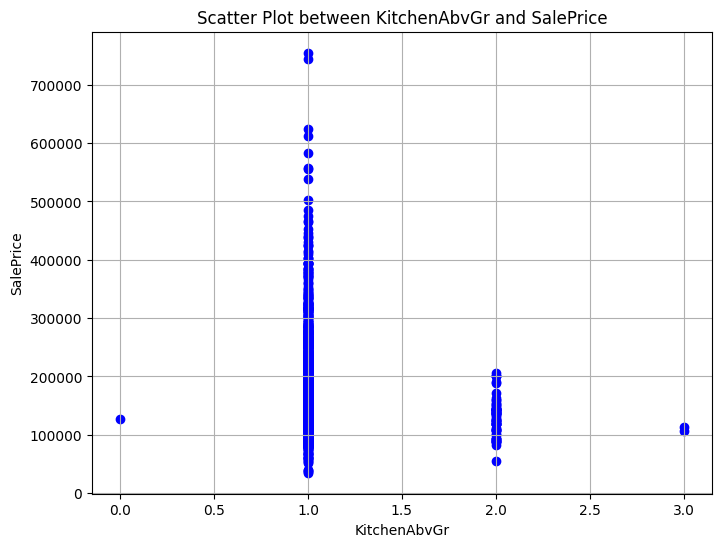

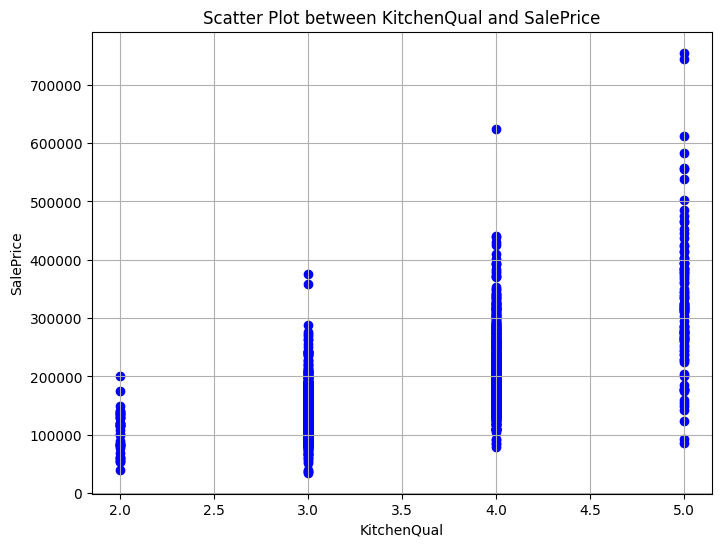

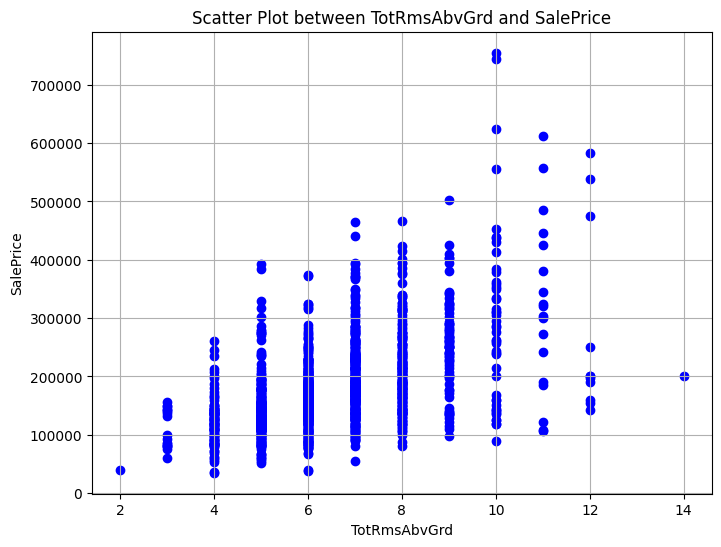

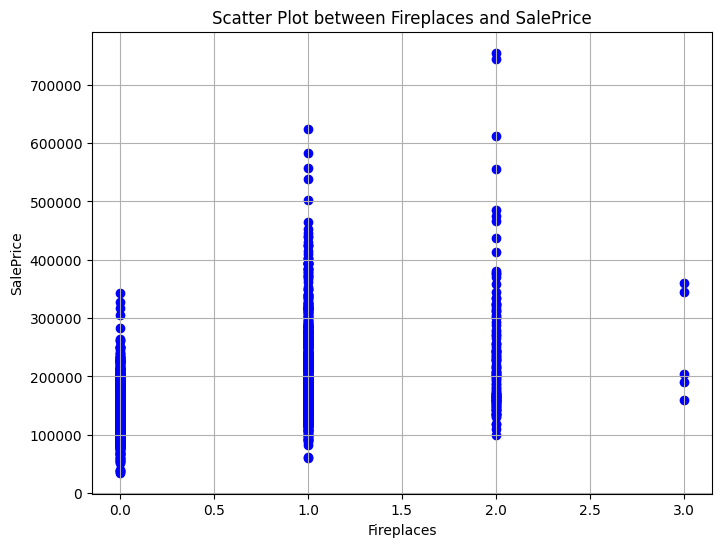

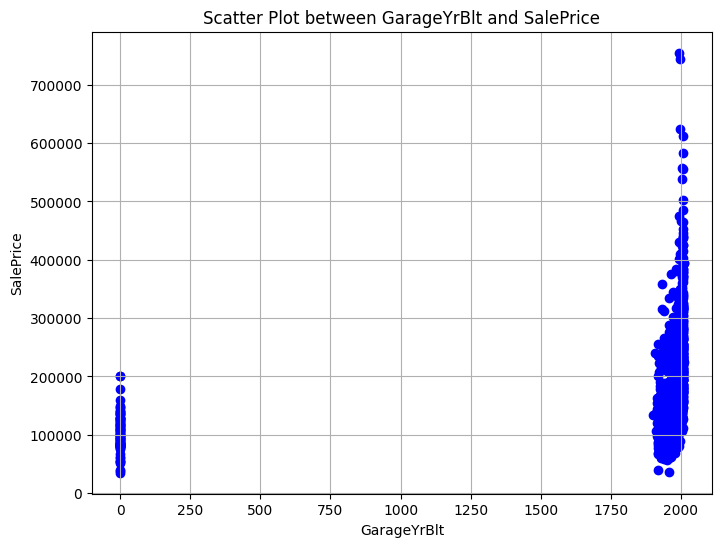

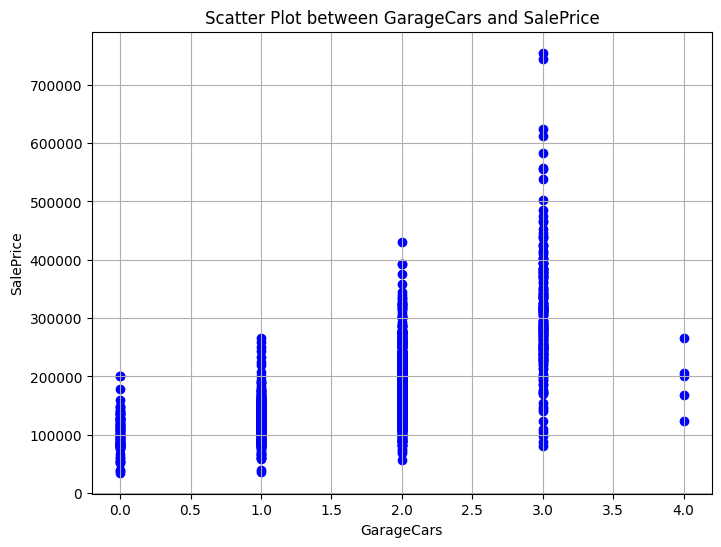

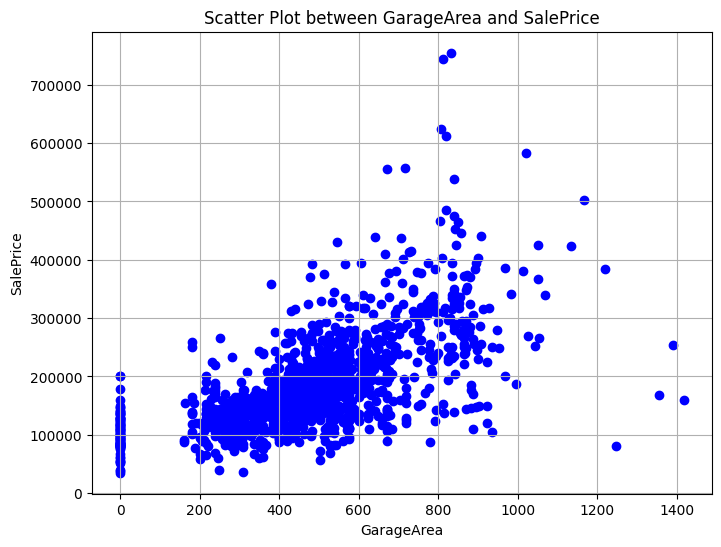

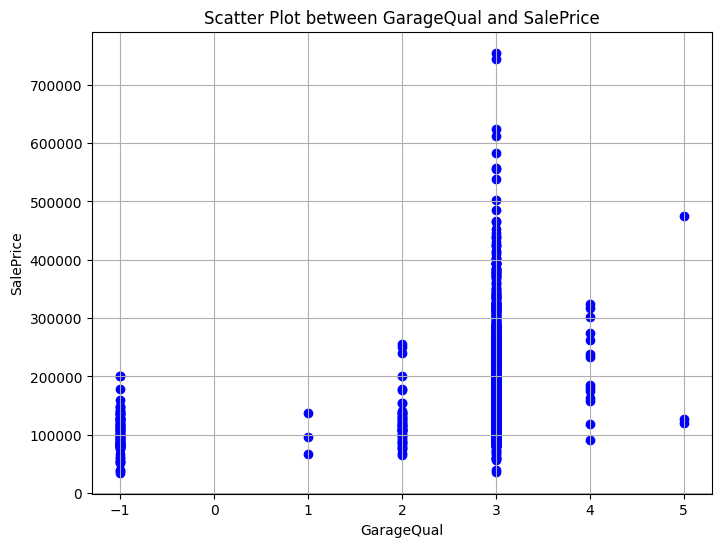

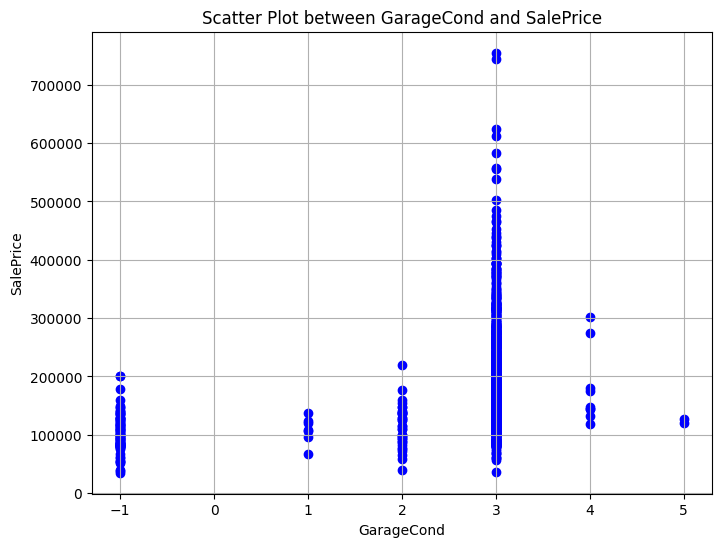

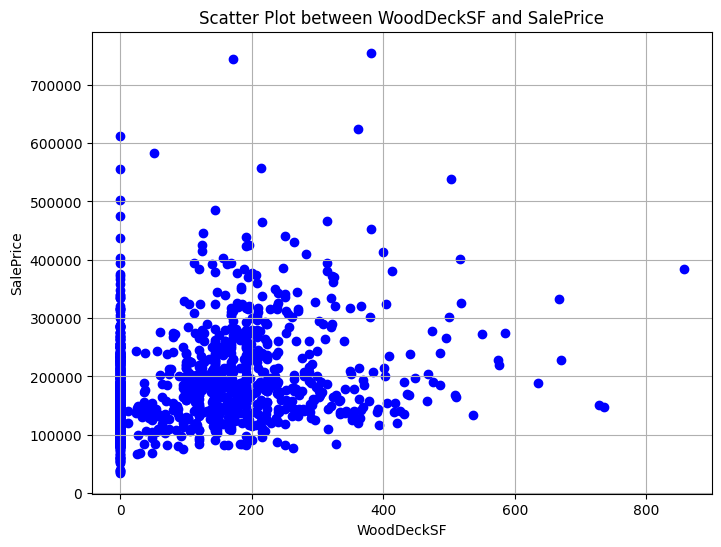

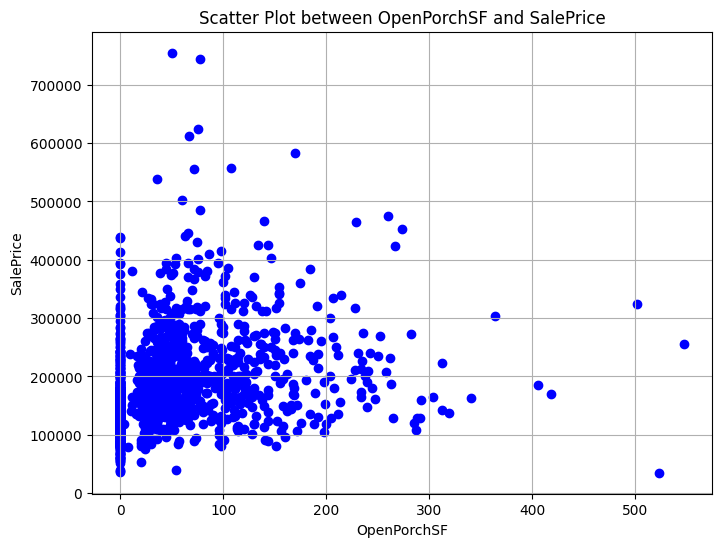

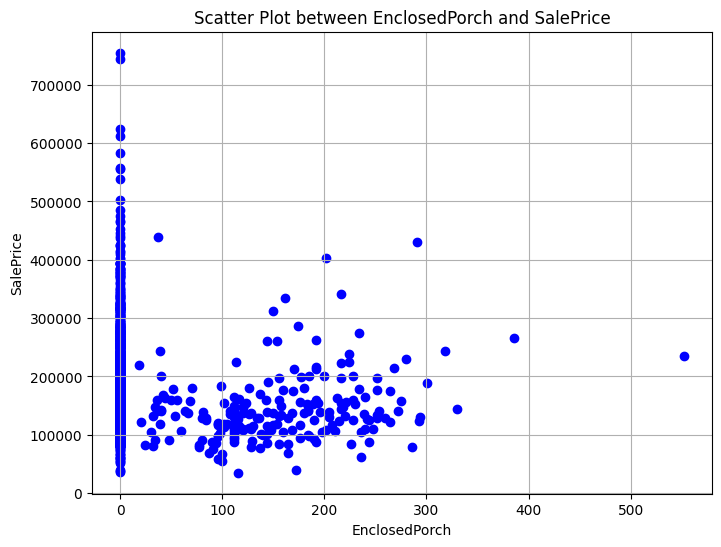

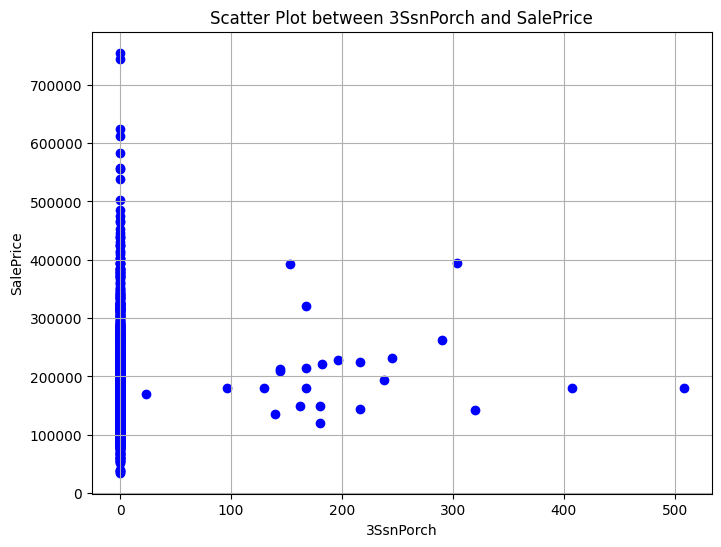

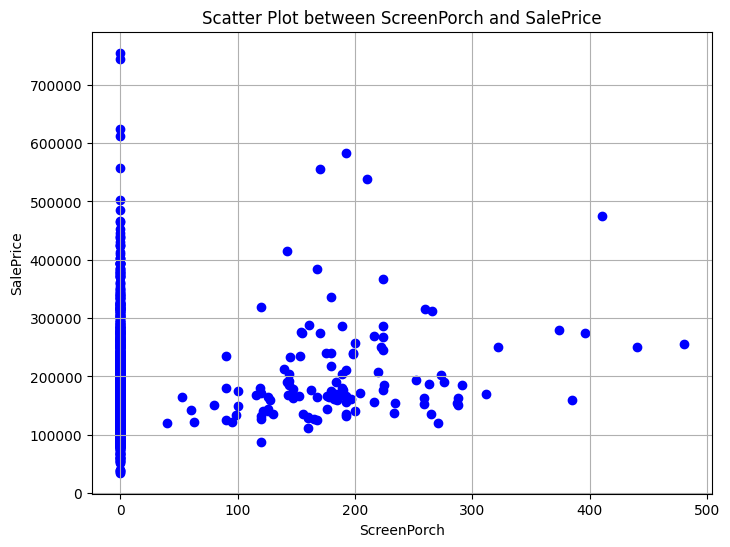

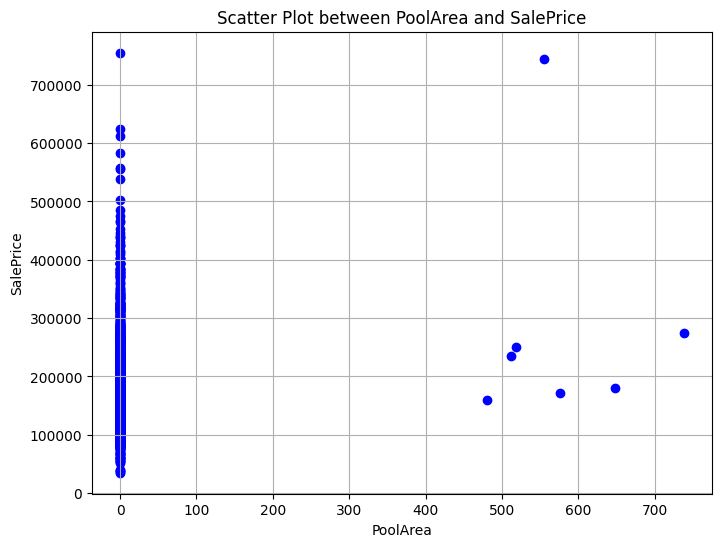

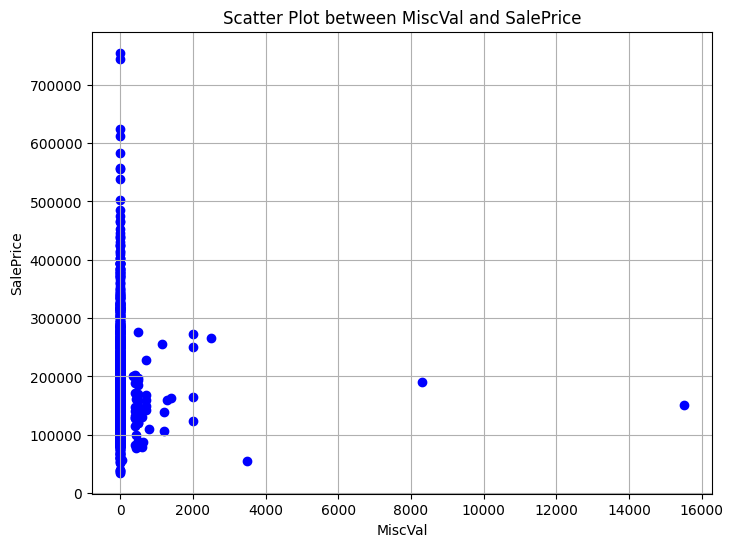

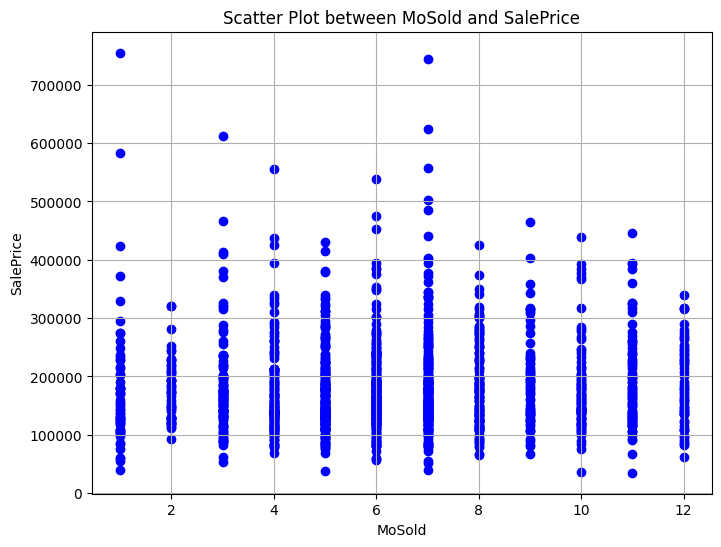

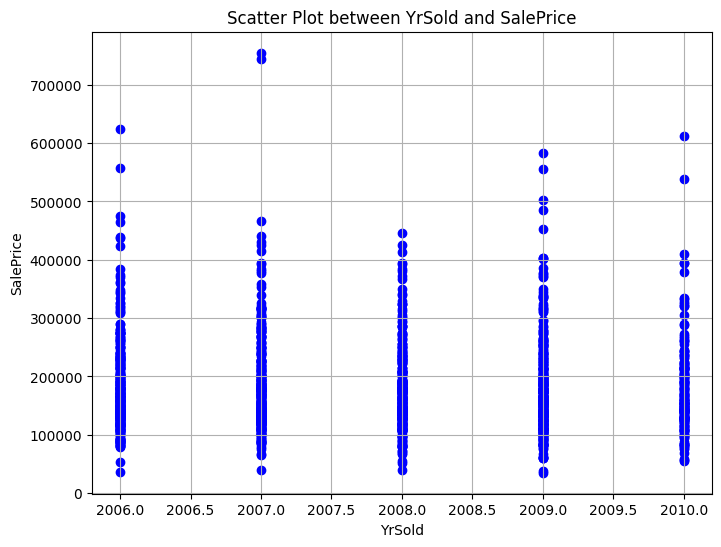

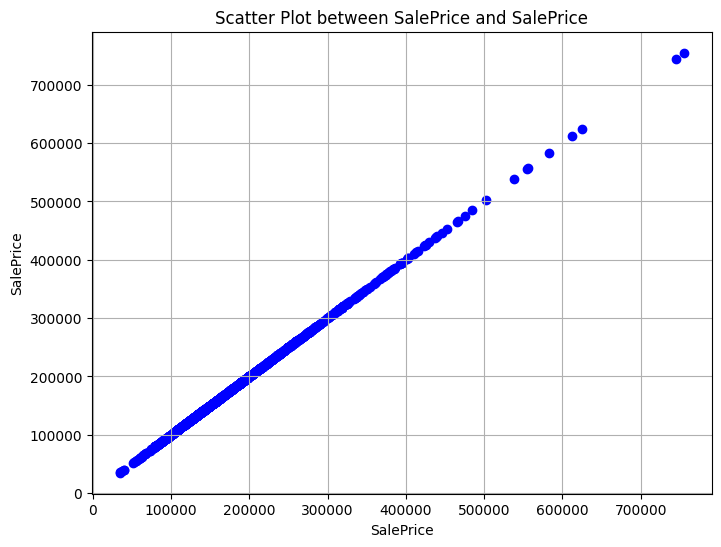

In [253]:
def plot_scatter_matrix(df, independent_columns, target_column):

    for col in independent_columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df[target_column], color='blue', marker='o')
        plt.title(f'Scatter Plot between {col} and {target_column}')
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.grid(True)
        plt.show()

housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

plot_scatter_matrix(housing, housing_numeric, 'SalePrice')


## MSSubClass is a categorical column but consists numerical values.  

In [254]:
# sns.pairplot(housing)
# plt.show()

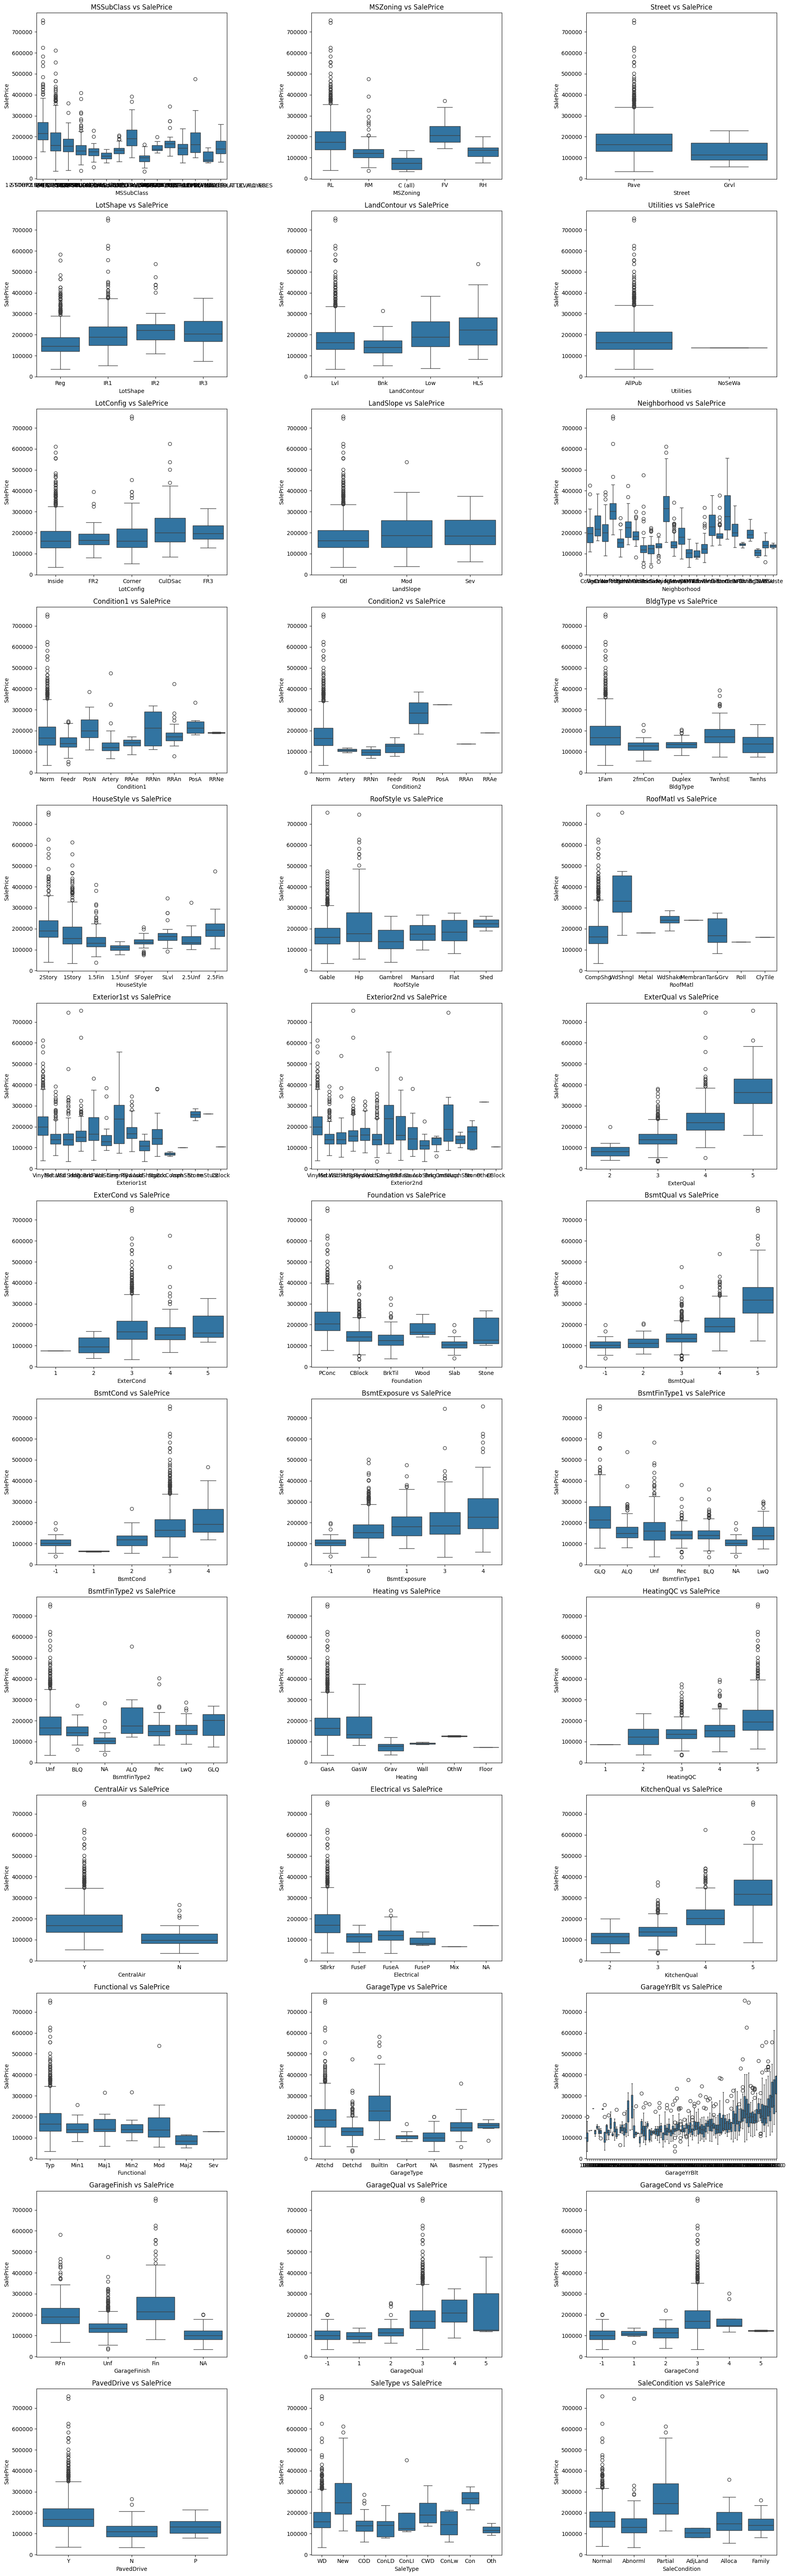

In [255]:
independent_vars = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
                    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                    'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                    'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# for i, var in enumerate(independent_vars, start=1):
#     plt.subplot(6, 7, i)
#     sns.boxplot(x=var, y='SalePrice', data=housing)

# plt.tight_layout()
# plt.show()

plots_per_row = 3
total_plots = len(independent_vars)
total_rows = (total_plots // plots_per_row) + int(total_plots % plots_per_row != 0)

plt.figure(figsize=(20, total_rows * 5))

for i, var in enumerate(independent_vars, start=1):
    plt.subplot(total_rows, plots_per_row, i)
    sns.boxplot(x=var, y='SalePrice', data=housing)
    plt.title(f'{var} vs SalePrice')

plt.tight_layout()
plt.show()

In [256]:
housing.MSSubClass.value_counts()

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

## 3. Data Preparation

#### Data Preparation
#Let's now prepare the data and build the model.

In [257]:
len(housing.columns)

74

In [258]:
housing['Conditions'] = housing['Condition1'] + ' and ' +housing['Condition2']
housing.drop(['Condition1','Condition2'], axis=1, inplace=True)

housing['Exteriors'] = housing['Exterior1st'] + ' and ' + housing['Exterior2nd']
housing.drop(['Exterior1st','Exterior2nd'], axis=1, inplace=True)

In [259]:
# creating dummy variables for categorical variables

# subset all categorical variables
categorical_columns = housing.select_dtypes(include=['object'])
numerical_columns = housing.select_dtypes(include=['float64', 'int64'])

len(categorical_columns.columns)
# print(numerical_columns.columns)


27

In [260]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(categorical_columns, drop_first=True, dtype=int)
housing_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Stree

In [261]:
df = housing.drop(columns=categorical_columns)
df = pd.concat([df, housing_dummies], axis=1)


In [262]:
np.random.seed(42)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [263]:
scaler = StandardScaler()

df_train[numerical_columns.columns] = scaler.fit_transform(df_train[numerical_columns.columns])
df_test[numerical_columns.columns] = scaler.transform(df_test[numerical_columns.columns])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
210     -0.115302 -0.473765    -0.779861     0.383154  -1.524903   
318      0.926898 -0.056845     0.649651    -0.533005   0.717033   
239     -0.794998 -0.169324    -0.065105    -1.449164  -0.865510   
986     -0.477806 -0.502297    -0.065105     2.215472  -2.019448   
1416    -0.432493  0.082905    -1.494617     0.383154  -2.843689   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
210      -1.694350   -0.558025  -0.698260  -0.260816 -0.442852  0.137649   
318       0.390956    0.809137   1.053395  -0.260816  0.540087  0.137649   
239      -1.694350   -0.558025  -0.698260  -0.260816 -0.442852 -1.240190   
986       0.875911   -0.558025  -0.698260   2.602556 -0.442852 -1.240190   
1416     -1.694350   -0.558025  -0.698260  -0.260816 -0.442852  0.137649   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
210      -0.608756    0.043512   -0.293313  -0.374367    -0.430911  -1.179071   
318       2.053085    1.160345   -0.293313  -0.454644     0.621579   0.873498   
239      -0.608756   -0.761296   -0.293313   0.171964    -0.712011  -1.179071   
986      -0.608756   -0.963574   -0.293313  -0.175904    -1.256778  -0.152787   
1416     -0.608756   -0.963574   -0.293313   0.475233    -0.620490  -0.152787   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210  -0.765065 -0.787597     -0.124502  -1.228053      1.066863     -0.247791   
318   0.511914  2.140556     -0.124502   2.123103      1.066863     -0.247791   
239  -0.930972  0.795996     -0.124502  -0.056465     -0.837450     -0.247791   
986  -0.420683  0.669584     -0.124502   0.221858     -0.837450     -0.247791   
1416  0.195183  1.611926     -0.124502   1.453624     -0.837450     -0.247791   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
210  -1.026085 -0.751723     -1.042717     -0.234155    -0.776063   
318   0.786428  1.246998      1.396261     -0.234155     0.741868   
239  -1.026085  1.246998      0.176772     -0.234155    -0.776063   
986  -1.026085 -0.751723     -1.042717     -0.234155     0.741868   
1416  0.786428 -0.751723      1.396261      4.112612    -0.776063   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
210      -0.935650   -0.925422    -4.069183   -2.366798   -2.217786   
318       1.556976    0.623522     0.276109    1.645101    0.867506   
239       0.310663    0.623522     0.180177   -1.029498   -1.183084   
986      -0.935650   -0.925422     0.182357   -1.029498   -1.018473   
1416      2.803289   -0.925422     0.228143    0.307802    0.416000   

      GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210    -3.954518   -3.950329   -0.743160    -0.709347       1.150231   
318     0.266666    0.268589    1.989482     0.197980       1.910043   
239     0.266666    0.268589   -0.743160     1.407748      -0.369395   
986    -0.788630    0.268589    2.423490    -0.709347      -0.369395   
1416    0.266666    0.268589   -0.743160    -0.709347       1.435160   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  \
210   -0.121922    -0.275126 -0.062302 -0.084263 -0.832187  0.134653   
318   -0.121922    -0.275126 -0.062302 -0.084263 -0.832187  0.881833   
239   -0.121922    -0.275126 -0.062302 -0.084263 -0.832187  1.629012   
986   -0.121922    -0.275126 -0.062302 -0.084263 -0.104424 -1.359706   
1416  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187  1.629012   

      SalePrice  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
210   -1.042855                                         0   
318    1.006390                                         0   
239   -0.853110                                         1   
986   -0.802511                                         1   
1416  -0.732938                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
210                                 1   
318      

In [264]:
# # split into train and test

# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the training data
# scaler.fit(train_df[numerical_columns])

# # Transform the training and testing data
# train_df[numerical_columns] = scaler.transform(train_df[numerical_columns])
# test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# # Combine scaled numerical and original categorical columns
# train_df_combined = pd.concat([train_df[categorical_columns].reset_index(drop=True),
#                                pd.DataFrame(train_df[numerical_columns], columns=numerical_columns)], axis=1)

# test_df_combined = pd.concat([test_df[categorical_columns].reset_index(drop=True),
#                               pd.DataFrame(test_df[numerical_columns], columns=numerical_columns)], axis=1)


In [265]:
df_train.describe()


LotFrontage       LotArea   OverallQual   OverallCond     YearBuilt  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   1.913803e-17  5.915390e-17  1.287467e-16  3.375252e-16 -3.317838e-15   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.199702e+00 -8.742840e-01 -3.638884e+00 -4.197642e+00 -3.272294e+00   
25%   -4.324932e-01 -2.950018e-01 -7.798608e-01 -5.330054e-01 -5.687830e-01   
50%   -2.467586e-02 -9.566430e-02 -6.510508e-02 -5.330054e-01  5.764038e-02   
75%    3.831415e-01  9.959718e-02  6.496507e-01  3.831537e-01  9.478209e-01   
max    1.103171e+01  1.987157e+01  2.793918e+00  3.131631e+00  1.277517e+00   

       YearRemodAdd    MasVnrArea     ExterQual     ExterCond      BsmtQual  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   9.395031e-17 -6.263354e-17 -2.348758e-16  3.653623e-16 -6.959282e-18   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.694350e+00 -5.580245e-01 -2.449915e+00 -3.124189e+00 -4.374605e+00   
25%   -8.699266e-01 -5.580245e-01 -6.982601e-01 -2.608165e-01 -4.428518e-01   
50%    4.394518e-01 -5.580245e-01 -6.982601e-01 -2.608165e-01  5.400866e-01   
75%    9.244068e-01  2.857702e-01  1.053395e+00 -2.608165e-01  5.400866e-01   
max    1.215380e+00  7.986733e+00  2.805050e+00  5.465928e+00  1.523025e+00   

           BsmtCond  BsmtExposure    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.157378e-16  8.351139e-17  6.089372e-17 -1.565839e-17  1.235273e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -5.373707e+00 -1.274216e+00 -9.635738e-01 -2.933126e-01 -1.257417e+00   
25%    1.376489e-01 -6.087560e-01 -9.635738e-01 -2.933126e-01 -7.757532e-01   
50%    1.376489e-01 -6.087560e-01 -1.200318e-01 -2.933126e-01 -2.271922e-01   
75%    1.376489e-01  1.387625e+00  5.685740e-01 -2.933126e-01  5.399012e-01   
max    1.515488e+00  2.053085e+00  1.118171e+01  8.338494e+00  3.951683e+00   

        TotalBsmtSF     HeatingQC      1stFlrSF      2ndFlrSF  LowQualFinSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   3.479641e-17  2.035590e-16 -2.566235e-16  4.262560e-17 -1.478848e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.313626e+00 -3.231641e+00 -2.001824e+00 -7.875971e-01 -1.245016e-01   
25%   -5.856252e-01 -1.179071e+00 -7.374138e-01 -7.875971e-01 -1.245016e-01   
50%   -1.519906e-01  8.734979e-01 -2.070153e-01 -7.875971e-01 -1.245016e-01   
75%    5.496695e-01  8.734979e-01  6.376005e-01  8.833350e-01 -1.245016e-01   
max    1.100048e+01  8.734979e-01  8.857522e+00  3.958586e+00  1.056363e+01   

          GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   1.096087e-16 -1.739821e-17 -5.219462e-18  1.670228e-16 -3.479641e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.029171e+00 -8.374505e-01 -2.477915e-01 -2.838598e+00 -7.517225e-01   
25%   -7.203020e-01 -8.374505e-01 -2.477915e-01 -1.026085e+00 -7.517225e-01   
50%   -9.595640e-02 -8.374505e-01 -2.477915e-01  7.864283e-01 -7.517225e-01   
75%    4.719724e-01  1.066863e+00 -2.477915e-01  7.864283e-01  1.246998e+00   
max    7.757258e+00  4.875491e+00  8.047130e+00  2.598941e+00  3.245719e+00   

       BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Fireplaces  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -2.122581e-16  3.845004e-16  3.096881e-16 -9.047067e-17  8.699103e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.481695e+00 -2.341549e-01 -2.293993e+00 -2.181963e+00 -9.254223e-01   
25%   -1.042717e+00 -2.341549e-01 -7.760625e-01 -9.35

In [266]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

## 3. Model Building and Evaluation
## Linear Regression

In [267]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [268]:
print(lm.intercept_)
print(lm.coef_)

-10.632567336346797
[ 2.96453662e-02  8.35153675e-02  1.34692936e-01  8.63929481e-02
  7.56054796e-02  1.02750007e-02  4.71676180e-02  4.06527779e-02
 -1.65921567e-02  7.27792151e-02 -3.59507966e-02  7.88579343e-02
  3.77346249e+10  1.38661687e+10  3.64142087e+10 -3.72640318e+10
 -4.46525840e-03  2.65858398e+11  2.90767509e+11  3.22014804e+10
 -3.55372096e+11  1.65445278e-02 -4.48719761e-04 -3.83034082e-03
 -7.37292571e-03 -3.98796055e-02 -4.40899062e-02  3.28807266e-02
  1.14936944e-02  1.03588699e-02  5.12157113e-01  3.44116809e-02
  3.50490318e-02  7.69729614e-02 -1.17950439e-02  7.25555420e-03
  1.88903809e-02 -1.07192993e-02  1.37329102e-02  1.18713379e-02
  2.96325684e-02  9.53674316e-03 -1.37176514e-02  7.24792480e-05
  5.84506989e-02  9.71927643e-02  3.44467163e-02  3.34625244e-02
  1.67228699e-01 -2.45566835e+09 -3.50879669e-01  1.06094360e-01
  9.94110107e-02  8.40492249e-02  2.81585725e+08 -9.60731506e-02
 -9.41963196e-02 -2.53677368e-01  4.45103645e-01  4.80304718e-01
  4.8

In [269]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9429064116701785
-9.94427030837741e+17
58.292553684747745
4.485193714448829e+20
0.05709358832982149
1.0240168297828376e+18


###Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


Text(0.5, 0, 'Errors')

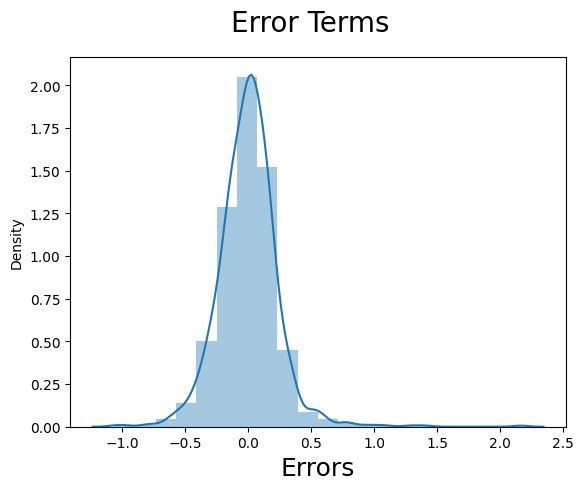

In [270]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'y_pred')

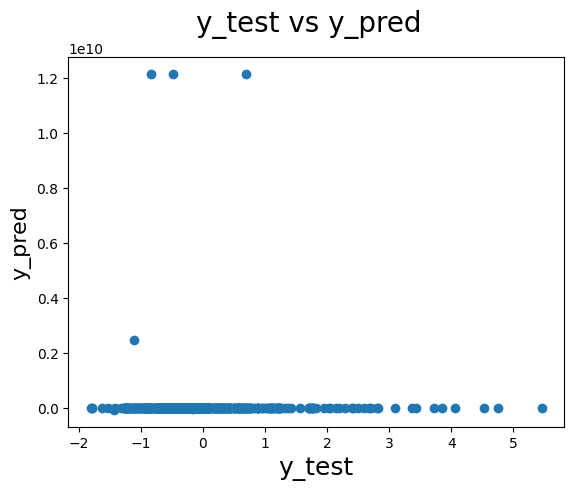

In [271]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

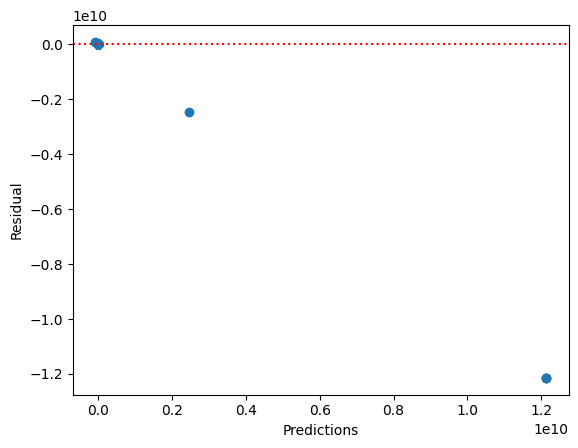

In [272]:
y_res = y_test - y_pred_test
plt.scatter( y_pred_test ,y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Ridge and Lasso Regression

In [273]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [274]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [275]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
# alpha = 20
ridge = Ridge(alpha=model_cv.best_params_['alpha'])

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.22130520e-02  4.65669785e-02  1.92929594e-01  6.87509304e-02
  1.75516316e-02 -3.52085317e-03  5.10353617e-02  6.25375131e-02
 -9.97720185e-03  8.57114484e-02 -5.32741141e-02  8.91755151e-02
  1.16106364e-02  6.28916090e-03  2.94646406e-03  1.69767656e-02
  1.13722111e-02  8.27929738e-02  1.37514524e-01 -1.12642116e-02
  1.73432972e-01  5.19167662e-02  7.75131529e-03  4.04301339e-02
  2.81145852e-02 -1.96805357e-02 -4.90017749e-02  7.61514753e-02
  4.21607116e-02  4.42425961e-02 -3.65626307e-02  1.00308788e-01
  2.91187379e-02  2.16170520e-02 -3.26290709e-02  2.25297852e-02
 -1.20987704e-02  3.35684551e-03  1.86143075e-02  1.62506268e-02
 -1.16498306e-02  7.39418988e-04 -6.78731999e-03 -1.36860621e-02
  4.16179529e-02  2.14235251e-02  9.51662939e-02 -5.51931027e-02
  5.64964171e-03 -2.46897626e-02 -8.94395198e-03  1.17050247e-03
  1.17054305e-02 -7.70047949e-02  7.11685177e-04 -7.44396758e-03
 -4.70055253e-03 -1.57298523e-02  2.20885982e-02  1.24613487e-02
  4.20458414e-02 -4.24290

In [276]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score on training set: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score on test set: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss on training set: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss on test set: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse on training set: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse on test set: ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 score on training set:  0.860263058800402
r2 score on test set:  0.8603786623276777
rss on training set:  142.67141696478956
rss on test set:  62.97382580230949
mse on training set:  0.139736941199598
mse on test set:  0.1437758579961404


In [277]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [278]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [279]:

lasso = Lasso(alpha=model_cv.best_params_['alpha'])

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [280]:
lasso.coef_

array([-1.67426566e-02,  5.57426186e-02,  1.72602998e-01,  7.54501561e-02,
        3.62618985e-02,  0.00000000e+00,  3.63878237e-02,  4.84614101e-02,
       -1.18773178e-02,  7.80574102e-02, -3.65515003e-02,  1.01446306e-01,
        1.13828646e-02,  9.50480994e-03, -0.00000000e+00,  0.00000000e+00,
        2.49660771e-03,  0.00000000e+00,  9.16174642e-02, -1.67934644e-02,
        3.53188244e-01,  5.31096623e-02,  7.81895777e-03,  3.10247217e-02,
        1.47705618e-02, -3.90180696e-02, -5.41192742e-02,  5.40004041e-02,
        2.23087634e-02,  3.01753887e-02, -2.91901431e-02,  1.07772779e-01,
       -0.00000000e+00,  5.92391249e-02, -6.52634303e-02,  1.24050445e-02,
        1.75154132e-03,  0.00000000e+00,  1.69209304e-02,  1.78406290e-02,
       -2.69320411e-02, -0.00000000e+00, -1.18358388e-02, -8.52087268e-03,
        1.06076372e-01,  0.00000000e+00,  4.84537277e-02, -8.34661650e-02,
        0.00000000e+00, -3.45622917e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [281]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score on training set: ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score on test set: ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss score on training set: ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss score on test set: ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse score on training set: ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse score on test set: ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 score on training set:  0.8986084414291955
r2 score on test set:  0.8500830388467437
rss score on training set:  103.52078130079144
rss score on test set:  67.61749137967365
mse score on training set:  0.10139155857080455
mse score on test set:  0.15437783420016815


In [282]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.429064e-01          0.860263          0.898608
1   R2 Score (Test)      -9.944270e+17          0.860379          0.850083
2       RSS (Train)       5.829255e+01        142.671417        103.520781
3        RSS (Test)       4.485194e+20         62.973826         67.617491
4       MSE (Train)       2.389426e-01          0.373814          0.318420
5        MSE (Test)       1.011937e+09          0.379178          0.392909

In [283]:
non_significant_features = X_train.columns[lasso.coef_ == 0]
significant_features = X_train.columns[lasso.coef_ != 0]
significant_coefficients = lasso.coef_[lasso.coef_ != 0]
significant_variables = pd.DataFrame({
    'Feature': significant_features,
    'Coefficient': significant_coefficients
})
pd.options.display.max_columns = None
significant_variables.sort_values(by='Coefficient')

Feature  Coefficient
102       Conditions_PosN and PosN    -2.857577
70                  BldgType_Twnhs    -0.279662
109    Exteriors_Stucco and Stucco    -0.234920
45                    LotShape_IR3    -0.202534
71                 BldgType_TwnhsE    -0.191413
..                             ...          ...
16                       GrLivArea     0.353188
63            Neighborhood_NoRidge     0.483362
64            Neighborhood_NridgHt     0.507359
79                RoofMatl_WdShngl     1.135937
112  Exteriors_Wd Sdng and ImStucc     1.424672

[116 rows x 2 columns]

In [284]:
print('Non Significant variables: ',non_significant_features)

Non Significant variables:  Index(['YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea',
       'EnclosedPorch', 'MiscVal', 'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2-1/2 STORY ALL AGES',
       ...
       'Exteriors_Wd Sdng and HdBoard', 'Exteriors_Wd Sdng and MetalSd',
       'Exteriors_Wd Sdng and Plywood', 'Exteriors_Wd Sdng and Stone',
       'Exteriors_Wd Sdng and Stucco', 'Exteriors_Wd Sdng and VinylSd',
       'Exteriors_WdShing and HdBoard', 'Exteriors_WdShing and Plywood',
       'Exteriors_WdShing and Stucco', 'Exteriors_WdShing and Wd Sdng'],
      dtype='object', length=148)


In [285]:
print('Significant variables: ', significant_features)

Significant variables:  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'Exteriors_CemntBd and CmentBd', 'Exteriors_HdBoard and HdBoard',
       'Exteriors_MetalSd and MetalSd', 'Exteriors_Stucco and Stucco',
       'Exteriors_VinylSd and VinylSd', 'Exteriors_VinylSd and Wd Shng',
       'Exteriors_Wd Sdng and ImStucc', 'Exteriors_Wd Sdng and Wd Sdng',
       'Exteriors_Wd Sdng and Wd Shng', 'Exteriors_WdShing and Wd Shng'],
      dtype='object', length=116)


Text(0.5, 0, 'Errors')

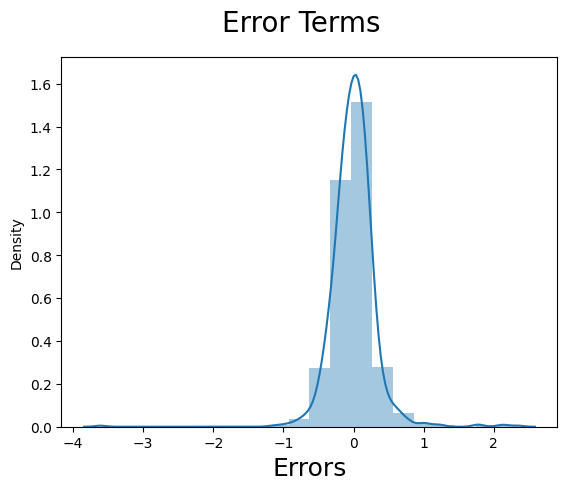

In [286]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

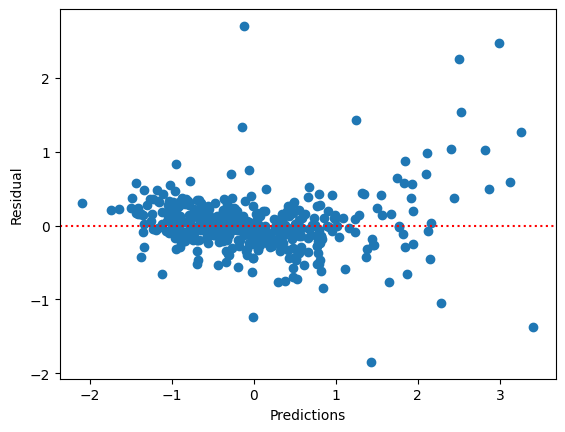

In [287]:
y_res = y_test - y_pred_test
plt.scatter( y_pred_test ,y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

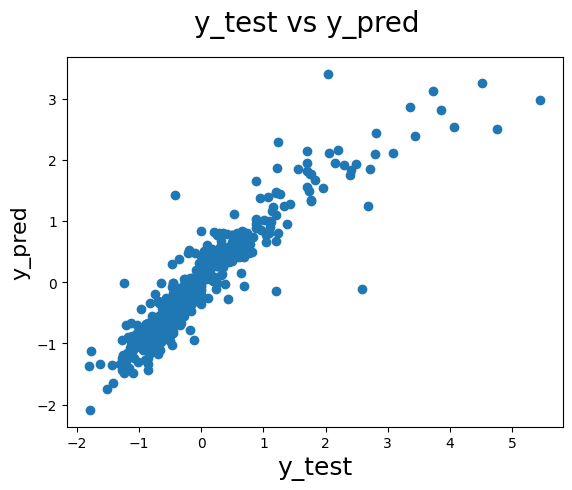

In [288]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)